In [ ]:
from typing import TypedDict, List, Annotated
import operator
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, MessagesState, START, END
from IPython.display import Image, display

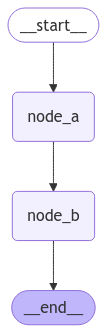

In [ ]:
class State(TypedDict):
    value: Annotated[List[str], operator.add]

def node_a(state: State):
    return {"value": ["a"]}

def node_b(state: State):
    return {"value": ["b"]}

workflow = StateGraph(State)

workflow.add_node(node_a)
workflow.add_node(node_b)
workflow.add_edge(START, "node_a")
workflow.add_edge("node_a", "node_b")
workflow.add_edge("node_b", END)

graph = workflow.compile()

display(
    Image(
        graph.get_graph().draw_mermaid_png()
    )
)

In [17]:
graph.invoke({"value":[]})

{'value': ['a', 'b']}

**Checkpoints**

In [18]:
checkpointer = MemorySaver()
graph = workflow.compile(checkpointer=checkpointer)

In [24]:
config = {"configurable": {"thread_id": "1"}}
graph.invoke({"value": []}, config)

{'value': ['a', 'b', 'a', 'b', 'a', 'b', 'a', 'b']}

In [25]:
config = {"configurable": {"thread_id": "2"}}
graph.invoke({"value": []}, config)

{'value': ['a', 'b', 'a', 'b']}

In [26]:
list(graph.get_state_history({"configurable": {"thread_id": "1"}}))

[StateSnapshot(values={'value': ['a', 'b', 'a', 'b', 'a', 'b', 'a', 'b']}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1eff1f6d-1ec9-6e3c-800f-a2ca36852428'}}, metadata={'source': 'loop', 'writes': {'node_b': {'value': ['b']}}, 'thread_id': '1', 'step': 15, 'parents': {}}, created_at='2025-02-23T14:59:45.796859+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1eff1f6d-1ec8-6474-800e-253761b503e6'}}, tasks=()),
 StateSnapshot(values={'value': ['a', 'b', 'a', 'b', 'a', 'b', 'a']}, next=('node_b',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1eff1f6d-1ec8-6474-800e-253761b503e6'}}, metadata={'source': 'loop', 'writes': {'node_a': {'value': ['a']}}, 'thread_id': '1', 'step': 14, 'parents': {}}, created_at='2025-02-23T14:59:45.796198+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1eff1f6d-1ec6-6930-800d-8aa0c2

In [27]:
list(graph.get_state_history({"configurable": {"thread_id": "2"}}))

[StateSnapshot(values={'value': ['a', 'b', 'a', 'b']}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1eff1f6d-3d86-647e-8006-9dbf721c5497'}}, metadata={'source': 'loop', 'writes': {'node_b': {'value': ['b']}}, 'thread_id': '2', 'step': 6, 'parents': {}}, created_at='2025-02-23T14:59:49.019747+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1eff1f6d-3d84-649e-8005-1fbfb22f4566'}}, tasks=()),
 StateSnapshot(values={'value': ['a', 'b', 'a']}, next=('node_b',), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1eff1f6d-3d84-649e-8005-1fbfb22f4566'}}, metadata={'source': 'loop', 'writes': {'node_a': {'value': ['a']}}, 'thread_id': '2', 'step': 5, 'parents': {}}, created_at='2025-02-23T14:59:49.018924+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1eff1f6d-3d7e-64fe-8004-31b003e8f49f'}}, tasks=(PregelTask(id='8c9948a9-

**Agent with Checkpoints**

In [ ]:
class State(MessagesState):
    summary: str

def agent_node(state: State):
    return {"value": ["a"]}

def node_b(state: State):
    return {"value": ["b"]}

workflow = StateGraph(State)

workflow.add_node(node_a)
workflow.add_node(node_b)
workflow.add_edge(START, "node_a")
workflow.add_edge("node_a", "node_b")
workflow.add_edge("node_b", END)

graph = workflow.compile()

display(
    Image(
        graph.get_graph().draw_mermaid_png()
    )
)